In [19]:
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy as np
from CQ10_plotting import plot_diagnosis_Qdata, plot_diagnosis_Qdata_nono 
from load_data import load_Q_data
import pycaret
import pycaret.classification as pc
from tqdm import tqdm 

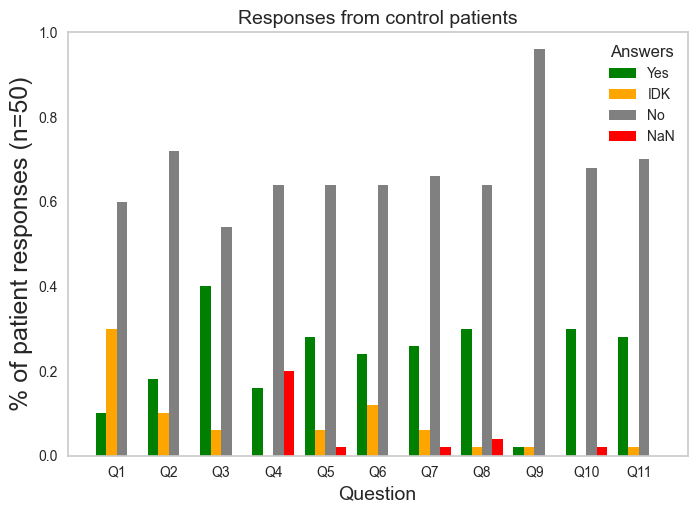

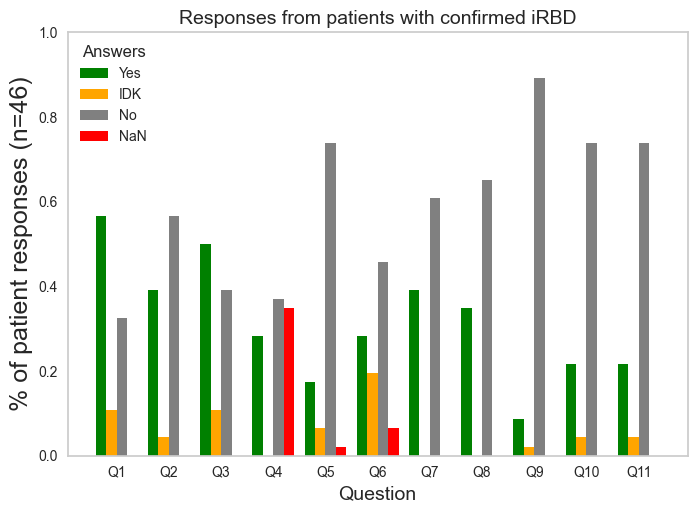

In [20]:
df = load_Q_data() 
plot_diagnosis_Qdata(df, 0,  "Responses from control patients","p_control_qs.jpg")
plot_diagnosis_Qdata(df, 1,  "Responses from patients with confirmed iRBD","p_iRBD_qs.jpg")

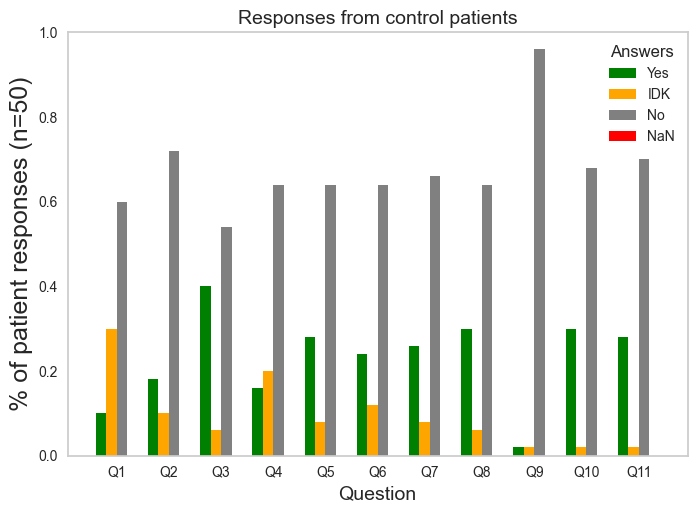

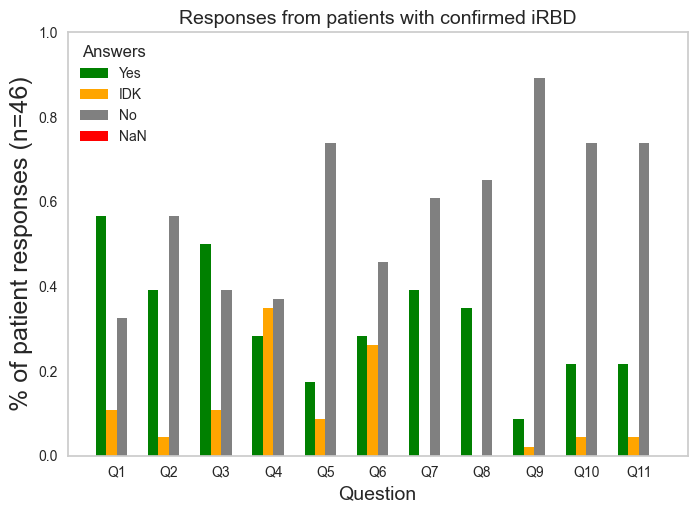

In [21]:

df_nonan = df.fillna(value=0.5) 
plot_diagnosis_Qdata(df_nonan, 0,  "Responses from control patients","noNAN_p_control_qs_nono.jpg")
plot_diagnosis_Qdata(df_nonan, 1,  "Responses from patients with confirmed iRBD","noNAN_p_iRBD_qs_nona.jpg")

Below we use pycaret to see which classification models should be the best. By default, pycaret's compare_models will do 10-fold cross validation  

In [4]:
pc.setup(data=df_nonan, target = 'Diagnosis',fold=10,train_size=0.95, preprocess=False,session_id=43)
best_models = pc.compare_models(fold=11, n_select=5)

,Description,Value
0,Session id,43
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(96, 12)"
4,Transformed data shape,"(96, 12)"
5,Transformed train set shape,"(91, 12)"
6,Transformed test set shape,"(5, 12)"
7,Numeric features,11


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7109,0.7318,0.6818,0.7273,0.6834,0.4197,0.4255,0.0573
rf,Random Forest Classifier,0.6818,0.7131,0.6364,0.6727,0.6407,0.3629,0.3657,0.0127
ada,Ada Boost Classifier,0.6667,0.7068,0.6818,0.6792,0.6521,0.3316,0.3535,0.0064
lda,Linear Discriminant Analysis,0.6528,0.6716,0.6136,0.6944,0.5944,0.3065,0.3416,0.0027
ridge,Ridge Classifier,0.6414,0.6830,0.5909,0.6879,0.5828,0.2838,0.3072,0.0073
gbc,Gradient Boosting Classifier,0.6364,0.6523,0.5909,0.6667,0.5912,0.2685,0.2765,0.0073
knn,K Neighbors Classifier,0.6351,0.6375,0.5455,0.6136,0.5630,0.2639,0.2684,0.0700
lr,Logistic Regression,0.6301,0.6761,0.5909,0.6738,0.5859,0.2610,0.2690,0.1409
dt,Decision Tree Classifier,0.6263,0.6188,0.6136,0.6061,0.5938,0.2558,0.2537,0.0027
et,Extra Trees Classifier,0.6250,0.6653,0.5909,0.5985,0.5812,0.2492,0.2499,0.0118


In [11]:
pc.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
rf = pc.create_model('rf')
mae_rf_opt = pc.tune_model(rf ,n_iter=10000, choose_better=True, search_library='optuna' ,search_algorithm='tpe')
auc_rf_opt = pc.tune_model(rf ,n_iter=10000, optimize='auc', choose_better=True, search_library='optuna' ,search_algorithm='tpe')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8000,0.6000,0.7500,0.6667,0.4000,0.4082
1,0.5556,0.6500,0.5000,0.5000,0.5000,0.1000,0.1000
2,0.4444,0.5500,0.5000,0.4000,0.4444,-0.0976,-0.1000
3,0.7778,0.7500,0.7500,0.7500,0.7500,0.5500,0.5500
4,0.5556,0.7000,0.5000,0.5000,0.5000,0.1000,0.1000
5,0.7778,0.7500,1.0000,0.6667,0.8000,0.5714,0.6325
6,0.8889,1.0000,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.5556,0.5000,0.6000,0.6000,0.6000,0.1000,0.1000
8,0.7778,0.9000,0.6000,1.0000,0.7500,0.5714,0.6325


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.8000,0.7500,0.6000,0.6667,0.3415,0.3500
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.8500,0.7500,1.0000,0.8571,0.7692,0.7906
4,0.7778,0.8000,0.7500,0.7500,0.7500,0.5500,0.5500
5,0.7778,0.8000,1.0000,0.6667,0.8000,0.5714,0.6325
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.5556,0.5000,0.8000,0.5714,0.6667,0.0526,0.0598
8,0.7778,0.7500,0.8000,0.8000,0.8000,0.5500,0.5500


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8800,0.8000,0.6667,0.7273,0.4000,0.4082
1,0.6667,0.8000,0.7500,0.6000,0.6667,0.3415,0.3500
2,0.8889,1.0000,0.7500,1.0000,0.8571,0.7692,0.7906
3,0.8889,0.9000,0.7500,1.0000,0.8571,0.7692,0.7906
4,0.7778,0.8000,0.7500,0.7500,0.7500,0.5500,0.5500
5,0.6667,0.9000,1.0000,0.5714,0.7273,0.3721,0.4781
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.4444,0.6000,0.6000,0.5000,0.5455,-0.1538,-0.1581
8,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500


In [22]:
lgbm = pc.create_model('lightgbm')
mae_lgbm_opt = pc.tune_model(lgbm ,n_iter=1000)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9200,0.8000,1.0000,0.8889,0.8000,0.8165
1,0.6667,0.7500,0.7500,0.6000,0.6667,0.3415,0.3500
2,0.8889,1.0000,0.7500,1.0000,0.8571,0.7692,0.7906
3,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500
4,0.5556,0.7000,0.7500,0.5000,0.6000,0.1429,0.1581
5,0.8889,0.8000,1.0000,0.8000,0.8889,0.7805,0.8000
6,0.7778,0.9000,0.7500,0.7500,0.7500,0.5500,0.5500
7,0.4444,0.4500,0.8000,0.5000,0.6154,-0.2162,-0.3162
8,0.7778,0.7000,0.8000,0.8000,0.8000,0.5500,0.5500


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9600,0.8000,1.0000,0.8889,0.8000,0.8165
1,0.7778,0.7500,0.7500,0.7500,0.7500,0.5500,0.5500
2,0.8889,1.0000,0.7500,1.0000,0.8571,0.7692,0.7906
3,0.7778,0.7000,0.7500,0.7500,0.7500,0.5500,0.5500
4,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500
5,0.8889,0.8000,1.0000,0.8000,0.8889,0.7805,0.8000
6,0.8889,0.9000,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
8,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
